<a href="https://colab.research.google.com/github/Moksha-nagraj/Marvel_tasks_lvl2/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**KMeans Clustering**
KMeans is an unsupervised learning algorithm used to group similar data points into clusters. It works by finding a predefined number of clusters (denoted as k) in the dataset, identifying centroids, and iteratively adjusting them to minimize the distance between data points and their respective centroids.

####**1. Import Required Libraries**
We begin by importing the necessary libraries and loading the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits (0-9).

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from scipy import sparse
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()

####**2. Check Dataset Shape**
Before proceeding, let's check the shape of the training and test datasets:

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


####**3. Visualize Some MNIST Images**
We can display a few images to better understand the dataset.

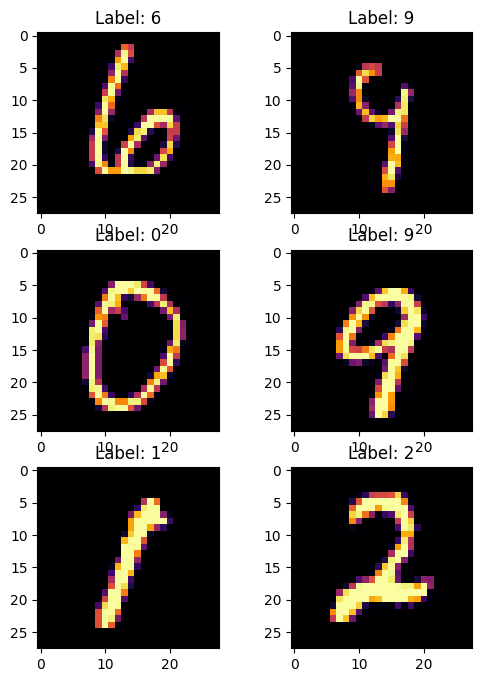

In [ ]:
plt.figure(figsize=(6, 8))
indices = np.random.choice(len(x_train), 6, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(3, 2, i + 1)
    plt.imshow(x_train[idx], cmap='inferno')
    plt.title(f'Label: {y_train[idx]}')
plt.show()


####**4. Data Preprocessing**
**Normalization:**
Since the pixel values range from 0 to 255, we normalize the data by dividing by 255.0, bringing all pixel values into the range [0, 1].

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Reshaping:**
We reshape the 28x28 images into 1D arrays (28 * 28 = 784 features per image) for easier processing with the KMeans algorithm.

In [ ]:
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


####**5.Building the Model Using MiniBatch KMeans**
KMeans is initialized with n_clusters equal to the number of unique labels (10 in the case of MNIST, representing digits 0-9). The MiniBatchKMeans algorithm is used for efficiency.

In [ ]:
# No. of clusters (digits 0-9)
total_clusters = len(np.unique(y_test))

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters=total_clusters)

# Convert training data to sparse format for efficiency
X_train_sparse = sparse.csr_matrix(X_train)

# Fit KMeans model
kmeans.fit(X_train_sparse)

# Output cluster labels
print(kmeans.labels_)

[3 9 0 ... 5 4 7]


####**6. Mapping Cluster Labels to Actual Digits**
The kmeans.labels_ array only indicates the cluster to which each image belongs, but we need to map these clusters to the actual digit labels. The following function achieves this by identifying the most frequent digit in each cluster.

In [ ]:
def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num
    return reference_labels

# Retrieve actual digit labels for each cluster
reference_labels = retrieve_info(kmeans.labels_, y_train)
print(reference_labels)

{0: 6, 1: 1, 2: 7, 3: 3, 4: 6, 5: 9, 6: 0, 7: 1, 8: 9, 9: 0}


####**7. Assigning Labels to Each Image**
We use the reference_labels dictionary to assign the correct digit label to each image based on the cluster it belongs to.

In [ ]:
number_labels = np.zeros(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

print(number_labels[:20].astype('int'))  # Predicted labels for the first 20 images
print(y_train[:20])                      # True labels


[3 0 6 1 9 0 1 3 1 9 3 1 3 6 1 7 6 1 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


####**8. Accuracy Calculation**
Finally, we calculate the accuracy of our model by comparing the predicted labels (number_labels) with the true labels (y_train).

In [ ]:
accuracy = accuracy_score(number_labels, y_train)
print("Accuracy:", accuracy)


Accuracy: 0.49788333333333334


####**9. Optimizing the Algorithm**
KMeans optimization can be improved by analyzing:

**Inertia:** A measure of how tightly the clusters are packed. Lower inertia indicates better-defined clusters.<br>
**Homogeneity:** A measure of how consistent the data points are within a cluster.